In [42]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [43]:
df = pd.read_csv('train.csv')
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


- Splitting into train and test dataset

In [44]:
X = df.drop(['Churn'], axis = 1)
X.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [45]:
Y = df['Churn']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33)

### Decision Tree classifier

In [47]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state = 42)

In [48]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [49]:
pred = model.predict(X_test)

In [50]:
print(classification_report(Y_test, pred, labels = [1,0]))

              precision    recall  f1-score   support

           1       0.64      0.45      0.53       613
           0       0.82      0.91      0.86      1712

    accuracy                           0.79      2325
   macro avg       0.73      0.68      0.70      2325
weighted avg       0.77      0.79      0.77      2325



 ### Model accuracy with minority class is very less hence will do the resampling

In [51]:
from imblearn.over_sampling import SMOTE
print(X_train.shape, Y_train.shape)
print(Y_train.value_counts())

(4718, 34) (4718,)
0    3462
1    1256
Name: Churn, dtype: int64


In [52]:
oversample = SMOTE()
X_train_sampled, Y_train_sampled = oversample.fit_resample(X_train,Y_train)

In [53]:
print(X_train_sampled.shape, Y_train_sampled.shape )

(6924, 34) (6924,)


In [54]:
Y_train_sampled.value_counts()

0    3462
1    3462
Name: Churn, dtype: int64

In [55]:
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state = 42)

In [56]:
model1.fit(X_train_sampled,  Y_train_sampled)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [58]:
pred1 = model1.predict(X_test)

In [59]:
print((classification_report(Y_test, pred1, labels = [1,0])))

              precision    recall  f1-score   support

           1       0.54      0.68      0.60       613
           0       0.87      0.79      0.83      1712

    accuracy                           0.76      2325
   macro avg       0.71      0.74      0.72      2325
weighted avg       0.79      0.76      0.77      2325



## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model_rf = RandomForestClassifier(n_estimators = 100,criterion = 'gini', max_depth = 6, random_state = 42)

In [67]:
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [68]:
pred_rf = model_rf.predict(X_test)

In [70]:
print(classification_report(Y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1712
           1       0.73      0.41      0.52       613

    accuracy                           0.80      2325
   macro avg       0.77      0.68      0.70      2325
weighted avg       0.79      0.80      0.78      2325



- Model built on Resampled data 

In [71]:
model_rf_rs = RandomForestClassifier(n_estimators = 100,criterion = 'gini', max_depth = 6, random_state = 42)

In [72]:
model_rf_rs.fit(X_train_sampled, Y_train_sampled)

RandomForestClassifier(max_depth=6, random_state=42)

In [73]:
pred_rf_rs = model_rf_rs.predict(X_test) 

In [74]:
print(classification_report(Y_test, pred_rf_rs))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1712
           1       0.54      0.74      0.63       613

    accuracy                           0.77      2325
   macro avg       0.72      0.76      0.73      2325
weighted avg       0.80      0.77      0.78      2325



C:\Users\RuturajMane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


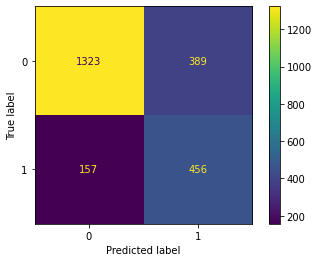

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_rf_rs, X_test, Y_test)

### Saving the model

In [77]:
import pickle 

In [78]:
file = 'model_rf_rs.sav'

In [79]:
pickle.dump(model_rf_rs, open(file, 'wb'))

In [81]:
loaded_model = pickle.load(open(file, 'rb'))

C:\Users\RuturajMane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


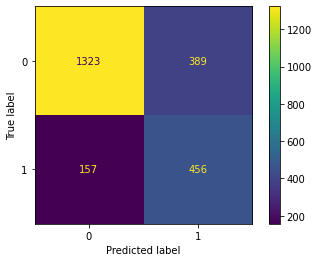

In [82]:
plot_confusion_matrix(loaded_model, X_test, Y_test)